In [1]:
## all libraries we've used so far
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv("/Users/eupirate/Desktop/CCT/data_visual_CA2/DATA FOR CA2-20240309/wellness_business_dataset.csv")

In [3]:
## df.head()
## df.shape
## (2000, 15)
## df.describe()
## df.info()
## df.isnull().sum()
## column Sales_Amount and Customer_Lifetime_Value contains missing data

In [4]:
## test out imputer and KNN, which approaches is most appropriate to handle our missing data
## based on the csv dataset, we know there are 2 columns contains missing data, they are: Sales_Amount and Customer_Lifetime_Value. with that info, I want to apply Imputer and KNN and compare the difference.

In [5]:
## SimpleImputer(strategy="mean")

mean_imputer=SimpleImputer(strategy="mean")
df["Sales_Amount_ImputeMean"]=mean_imputer.fit_transform(df[["Sales_Amount"]])
df["Customer_LT_ImputeMean"]=mean_imputer.fit_transform(df[["Customer_Lifetime_Value"]])

## df
## df.describe()
#df.isnull().sum() # new columns "Sales_Amount_ImputeMean" and "Customer_LT_ImputeMean " created, missing data handled

In [6]:
## KNN Imputer
knn_imputer=KNNImputer(n_neighbors=5)
df_knn_imputed=knn_imputer.fit_transform(df[["Sales_Amount", "Customer_Lifetime_Value"]])
# Sales_Amount column
df["Sales_Amount_KNN_Imputed"]=df_knn_imputed[:,0]
# Customer_Lifetime_Value
df["Customer_LT_KNN_Imputed"]=df_knn_imputed[:,1]
df
df.describe()
df.isnull().sum()

Sales_Amount                    99
Customer_Age                     0
Transaction_Count                0
Product_Category                 0
Region                           0
Repeat_Customer                  0
Income_Level                     0
Customer_Lifetime_Value        100
Annual_Spend                     0
Average_Discount_Utilized        0
Session_Duration_Minutes         0
Page_Views_per_Session           0
Ad_Clicks_per_Session            0
Products_Viewed_per_Session      0
Subscription_Status              0
Sales_Amount_ImputeMean          0
Customer_LT_ImputeMean           0
Sales_Amount_KNN_Imputed         0
Customer_LT_KNN_Imputed          0
dtype: int64

In [7]:
# I want to compare handled missing data results of column Sales_Amount and Customer_Lifetime_Value
original_describe=df[["Sales_Amount","Customer_Lifetime_Value"]].describe()
mean_imputed_describe=df[["Sales_Amount_ImputeMean","Customer_LT_ImputeMean"]].describe()
knn_imputed_describe=df[["Sales_Amount_KNN_Imputed","Customer_LT_KNN_Imputed"]].describe()

print("Original Data:\n", original_describe, "\n")
print("Mean Imputed Data:\n", mean_imputed_describe, "\n")
print("KNN Imputed Data:\n", knn_imputed_describe, "\n")

Original Data:
        Sales_Amount  Customer_Lifetime_Value
count   1901.000000              1900.000000
mean     100.912552             10193.947060
std       19.787991              4938.539437
min       35.174653             -6206.336700
25%       87.764618              6874.976957
50%      100.928731             10183.167575
75%      113.591955             13407.991980
max      177.054630             29263.657450 

Mean Imputed Data:
        Sales_Amount_ImputeMean  Customer_LT_ImputeMean
count              2000.000000             2000.000000
mean                100.912552            10193.947060
std                  19.291771             4813.429458
min                  35.174653            -6206.336700
25%                  88.468487             7037.942460
50%                 100.912552            10193.947060
75%                 112.763729            13193.134495
max                 177.054630            29263.657450 

KNN Imputed Data:
        Sales_Amount_KNN_Imputed  Customer

In [8]:
## After comparison, both methods have handled missing data successfully!
## Mean Imputered data are identical to the original data
## KNN Imputered data Sales_Amount_KNN_Imputed mean is lower than the original data
## KNN Imputered data Customer_LT_KNN_Imputed is higher than the original data
## Therefore, I have decided to proceed the Mean Imputed dataset to do further analysis by exporting a new dataframe name as 'df_ImputeMean'

In [9]:
df_ImputeMean=df.drop(["Sales_Amount","Customer_Lifetime_Value","Sales_Amount_KNN_Imputed","Customer_LT_KNN_Imputed"], axis=1)
df_ImputeMean.describe()
# ensure no more missing data
df_ImputeMean.isnull().sum()

Customer_Age                   0
Transaction_Count              0
Product_Category               0
Region                         0
Repeat_Customer                0
Income_Level                   0
Annual_Spend                   0
Average_Discount_Utilized      0
Session_Duration_Minutes       0
Page_Views_per_Session         0
Ad_Clicks_per_Session          0
Products_Viewed_per_Session    0
Subscription_Status            0
Sales_Amount_ImputeMean        0
Customer_LT_ImputeMean         0
dtype: int64

In [10]:
## export new dataframe to a new csv ( "df_ImputeMean.csv" )
# df_ImputeMean.to_csv("df_ImputeMean.csv",index=False)

## import os
## print(os.getcwd())
# /Users/eupirate/Documents/DA_L7/L7_term2/visualization

In [11]:
# read exported df_ImputeMean.csv
df_ImputeMean=pd.read_csv("/Users/eupirate/Desktop/CCT/data_visual_CA2/DATA FOR CA2-20240309/exported_csv/df_ImputeMean.csv")
df_ImputeMean.isnull().sum()

Customer_Age                   0
Transaction_Count              0
Product_Category               0
Region                         0
Repeat_Customer                0
Income_Level                   0
Annual_Spend                   0
Average_Discount_Utilized      0
Session_Duration_Minutes       0
Page_Views_per_Session         0
Ad_Clicks_per_Session          0
Products_Viewed_per_Session    0
Subscription_Status            0
Sales_Amount_ImputeMean        0
Customer_LT_ImputeMean         0
dtype: int64

In [12]:
df_ImputeMean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_Age                 2000 non-null   int64  
 1   Transaction_Count            2000 non-null   int64  
 2   Product_Category             2000 non-null   object 
 3   Region                       2000 non-null   object 
 4   Repeat_Customer              2000 non-null   object 
 5   Income_Level                 2000 non-null   object 
 6   Annual_Spend                 2000 non-null   float64
 7   Average_Discount_Utilized    2000 non-null   float64
 8   Session_Duration_Minutes     2000 non-null   float64
 9   Page_Views_per_Session       2000 non-null   int64  
 10  Ad_Clicks_per_Session        2000 non-null   int64  
 11  Products_Viewed_per_Session  2000 non-null   int64  
 12  Subscription_Status          2000 non-null   object 
 13  Sales_Amount_Imput

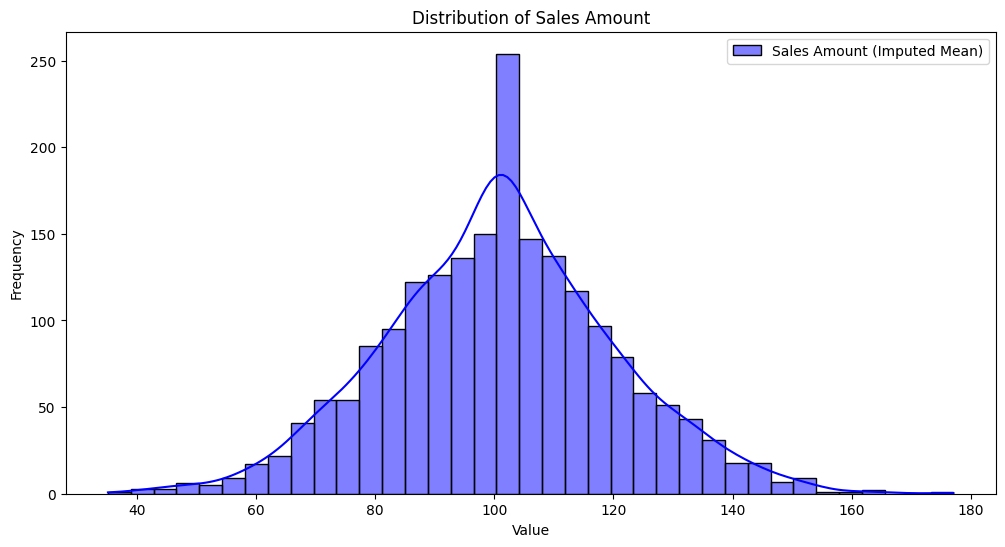

In [13]:
## 1. Distribution of Imputed Mean Sales Amount
plt.figure(figsize=(12, 6))
sns.histplot(df_ImputeMean["Sales_Amount_ImputeMean"],kde=True,color="blue", label="Sales Amount (Imputed Mean)")
plt.title("Distribution of Sales Amount")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


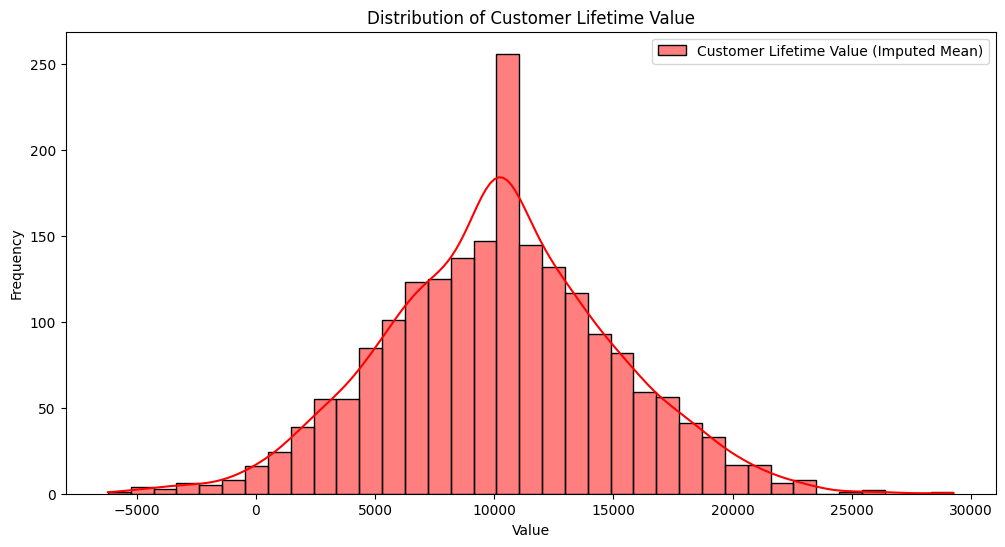

In [14]:
## 2. Distribution of Imputed Mean Customer Lifetime Value

plt.figure(figsize=(12, 6))
sns.histplot(df_ImputeMean["Customer_LT_ImputeMean"],kde=True,color="red", label="Customer Lifetime Value (Imputed Mean)")
plt.title("Distribution of Customer Lifetime Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


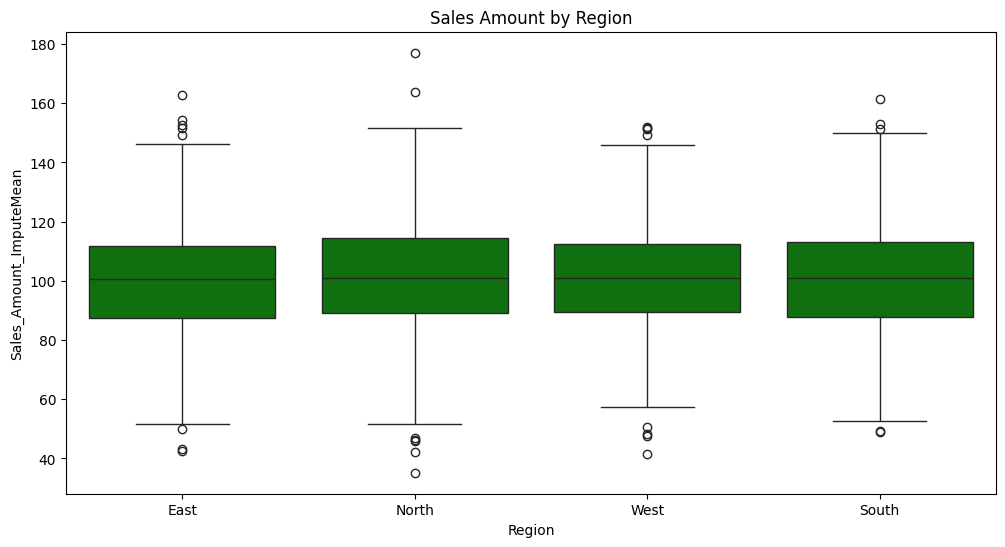

In [15]:
## 3. Sales Amount (Imputed Mean) by Region Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region",y="Sales_Amount_ImputeMean",color="green",data=df_ImputeMean)
plt.title("Sales Amount by Region")
plt.show()

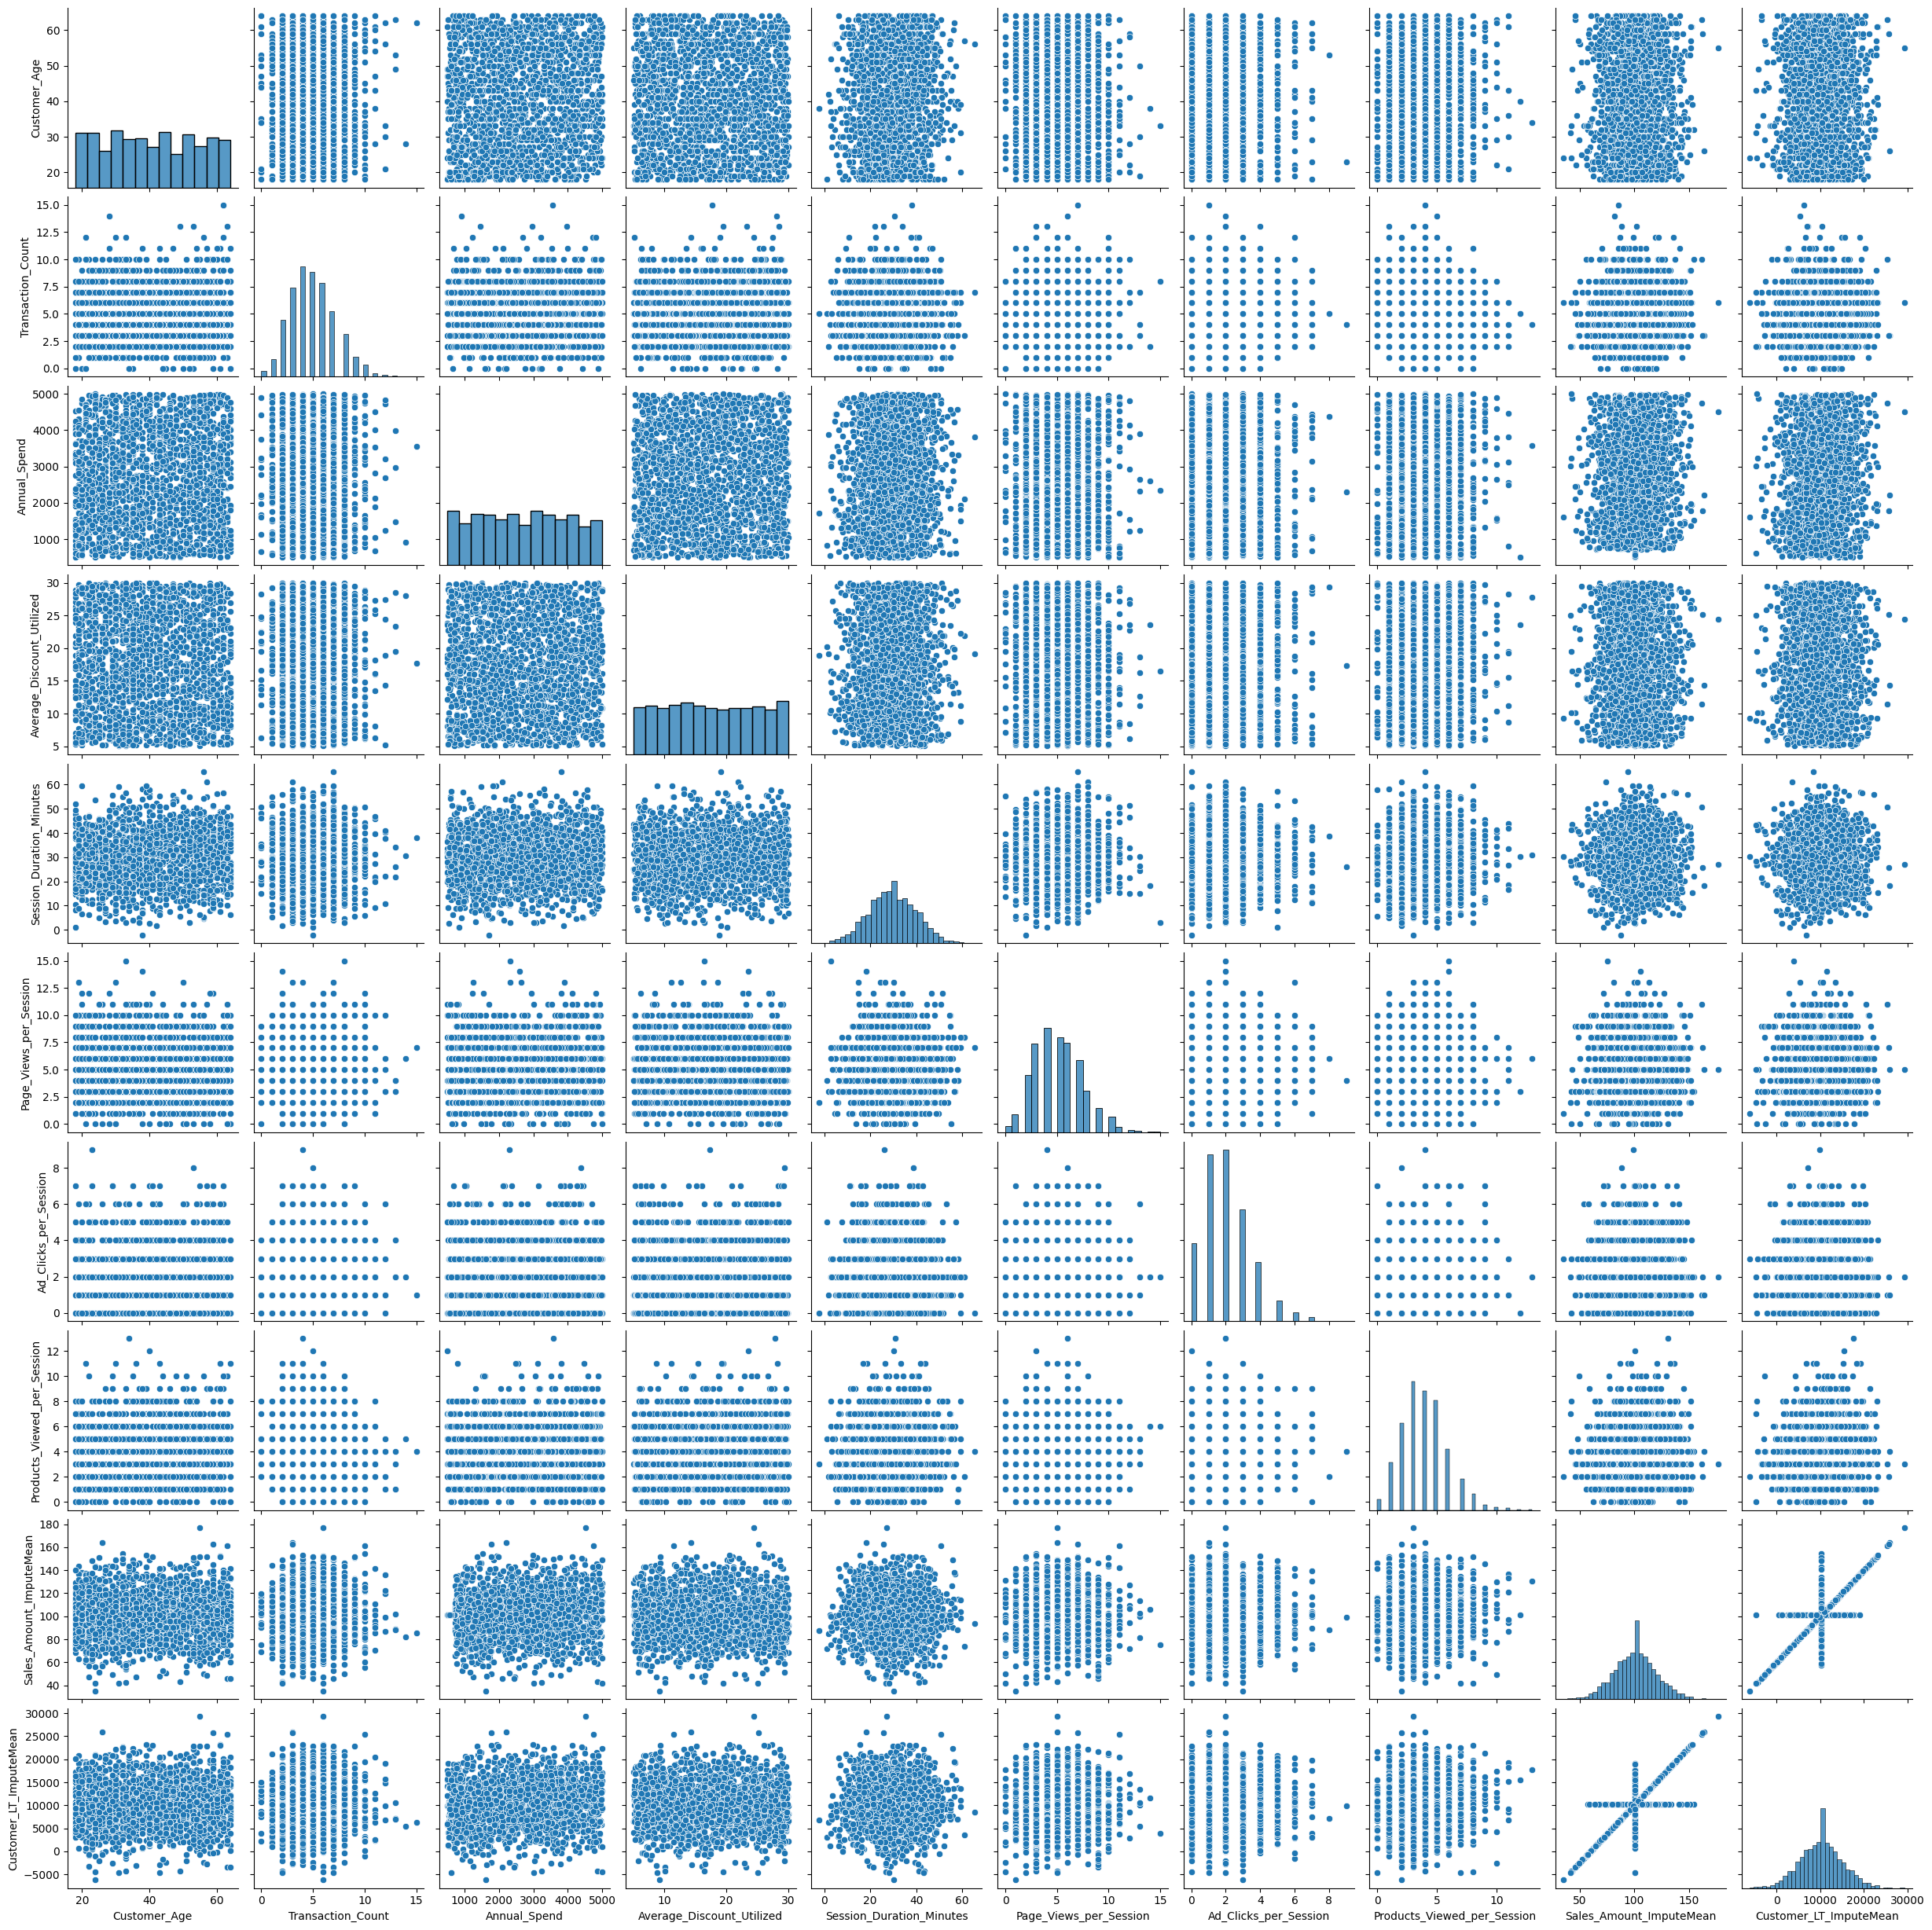

In [16]:
## 4. Pair Plot ( this is interesting but overwhelming!! )
sns.pairplot(df_ImputeMean)
plt.show()